In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import isodate
import ast
from collections import Counter

# Load the dataset
df = pd.read_csv(r'C:\Users\User\Downloads\Competition\Loreal_Datathon\dataset\videos.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Types and Non-Null Counts:")
df.info()

# Preview the first few rows
print("\nDataset Head:")
df.head()

Dataset Shape: (92759, 15)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kind                  92759 non-null  object 
 1   videoId               92759 non-null  int64  
 2   publishedAt           92759 non-null  object 
 3   channelId             92759 non-null  int64  
 4   title                 92759 non-null  object 
 5   description           35237 non-null  object 
 6   tags                  20891 non-null  object 
 7   defaultLanguage       15785 non-null  object 
 8   defaultAudioLanguage  29956 non-null  object 
 9   contentDuration       91492 non-null  object 
 10  viewCount             91490 non-null  float64
 11  likeCount             86630 non-null  float64
 12  favouriteCount        91492 non-null  float64
 13  commentCount          90294 non-null  float64
 14  topicCateg

,kind,videoId,publishedAt,channelId,title,description,tags,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,likeCount,favouriteCount,commentCount,topicCategories
0,youtube#video,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,en-US,en-US,PT9S,72.0,0.0,0.0,0.0,"['https://en.wikipedia.org/wiki/Health', 'http..."
1,youtube#video,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,NaN,NaN,PT45S,257.0,7.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
2,youtube#video,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,NaN,en-US,PT19S,164.0,4.0,0.0,2.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
3,youtube#video,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,NaN,NaN,PT14S,1207.0,20.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,youtube#video,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,NaN,en,PT56S,8647.0,268.0,0.0,7.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...


In [7]:
# Convert publishedAt to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Convert contentDuration (ISO 8601) to seconds
# The isodate library is perfect for this task
df['duration_seconds'] = df['contentDuration'].apply(lambda x: isodate.parse_duration(x).total_seconds() if pd.notna(x) else 0)

# Clean and convert numeric columns
for col in ['viewCount', 'likeCount', 'commentCount', 'favouriteCount']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Handle missing tags by filling with an empty string
df['tags'] = df['tags'].fillna('')

# Engineer time-based features
df['publish_year'] = df['publishedAt'].dt.year
df['publish_month'] = df['publishedAt'].dt.month
df['publish_dayofweek'] = df['publishedAt'].dt.day_name()

# Display the cleaned data types and the first few rows with new features
print("Cleaned Data Info:")
df[['publishedAt', 'duration_seconds', 'viewCount', 'publish_year']].info()
print("\nData Head with New Features:")
df[['title', 'publishedAt', 'duration_seconds', 'viewCount', 'publish_year']].head()

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   publishedAt       92759 non-null  datetime64[ns, UTC]
 1   duration_seconds  92759 non-null  float64            
 2   viewCount         92759 non-null  int64              
 3   publish_year      92759 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), int64(1)
memory usage: 2.5 MB

Data Head with New Features:


,title,publishedAt,duration_seconds,viewCount,publish_year
0,Unlocking the Benefits of Face Masks for Skin ...,2024-01-15 00:59:29+00:00,9.0,72,2024
1,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,2023-10-27 19:32:16+00:00,45.0,257,2023
2,#trending #makeup #beautymakeup #yslbeauty #lu...,2024-09-28 01:23:22+00:00,19.0,164,2024
3,#shortvedio #balayage,2023-07-13 15:19:28+00:00,14.0,1207,2023
4,Full Face of Merit Beauty 🤎 featuring new Flus...,2023-04-29 18:47:37+00:00,56.0,8647,2023


In [8]:
# Generate descriptive statistics for key numerical columns
stats = df[['viewCount', 'likeCount', 'commentCount', 'duration_seconds']].describe()
print(stats)

          viewCount     likeCount   commentCount  duration_seconds
count  9.275900e+04  9.275900e+04   92759.000000      92759.000000
mean   2.317471e+05  6.614777e+03      64.011708         69.371058
std    3.100313e+06  7.915547e+04     980.150736        339.935784
min    0.000000e+00  0.000000e+00       0.000000          0.000000
25%    1.720000e+02  3.000000e+00       0.000000         12.000000
50%    8.730000e+02  1.600000e+01       0.000000         20.000000
75%    3.332000e+03  6.300000e+01       3.000000         42.000000
max    4.057481e+08  7.162433e+06  101405.000000      32739.000000


C:\Users\User\AppData\Local\Temp\ipykernel_19884\1140869809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, ax=ax1, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_19884\1140869809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, ax=ax2, palette='plasma')


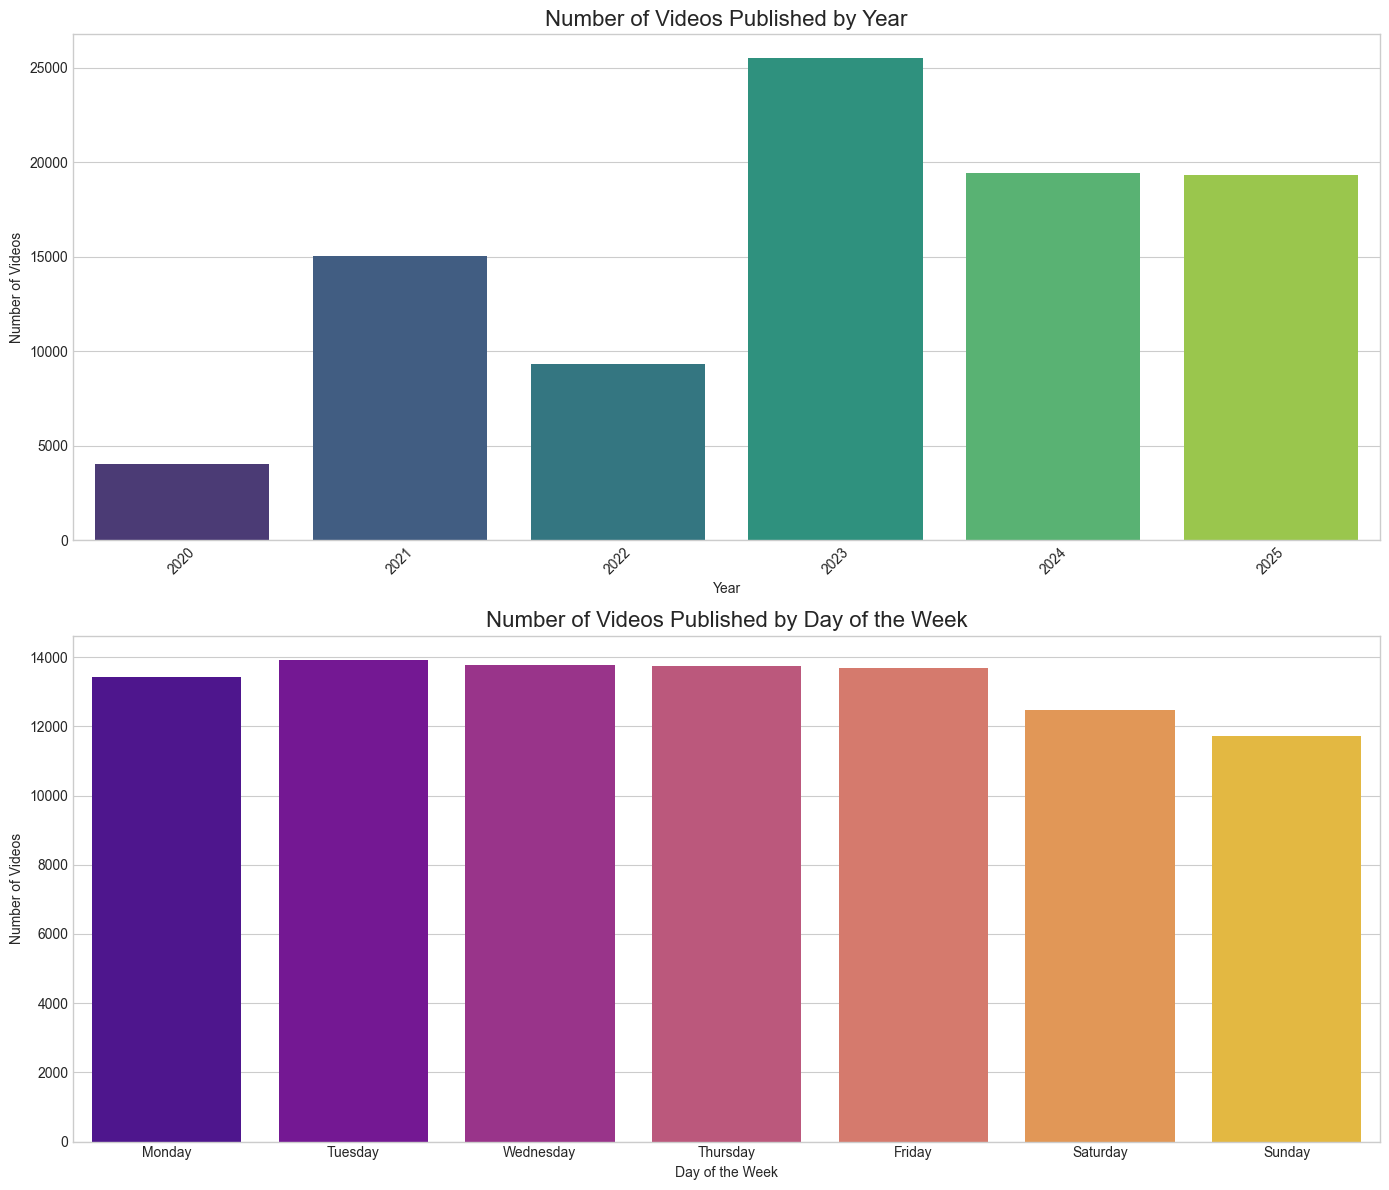

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot videos published per year
yearly_counts = df['publish_year'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, ax=ax1, palette='viridis')
ax1.set_title('Number of Videos Published by Year', fontsize=16)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Videos')
ax1.tick_params(axis='x', rotation=45)

# Plot videos published by day of the week
daily_counts = df['publish_dayofweek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=daily_counts.index, y=daily_counts.values, ax=ax2, palette='plasma')
ax2.set_title('Number of Videos Published by Day of the Week', fontsize=16)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Videos')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\75006774.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='duration_bin', y='views_per_day', estimator=np.mean, palette='plasma', order=labels)


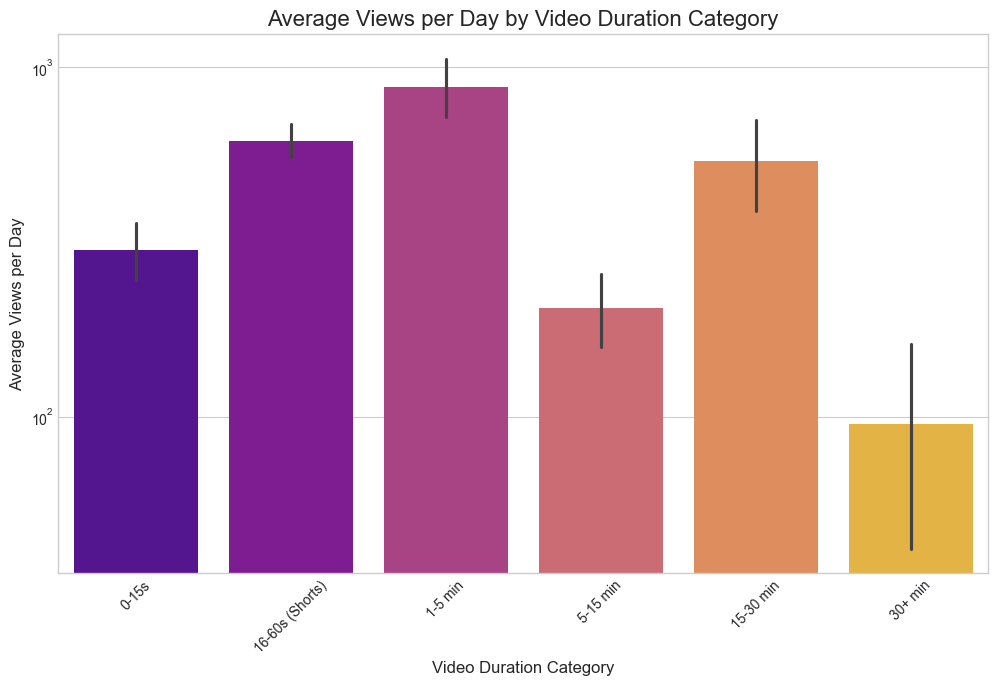

In [15]:
# First, we need to create the 'views_per_day' and the duration category column
# Ensure 'publishedAt' is in datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Calculate the number of days since publication
# Use pd.Timestamp.now with a timezone to avoid errors
days_since_published = (pd.Timestamp.now(tz='UTC') - df['publishedAt']).dt.days

# Calculate views_per_day, avoiding division by zero for videos published today
df['views_per_day'] = df['viewCount'] / (days_since_published + 1) # Add 1 to avoid dividing by zero

# Create duration bins as we did before
bins = [0, 15, 60, 300, 900, 1800, np.inf]
labels = ['0-15s', '16-60s (Shorts)', '1-5 min', '5-15 min', '15-30 min', '30+ min']
df['duration_bin'] = pd.cut(df['duration_seconds'], bins=bins, labels=labels, right=False)

# --- CORRECTED GRAPH CODE ---
# Graph 1: Relationship between views per day and video duration category
plt.figure(figsize=(12, 7))
# The 'x' variable was corrected from 'video_duration_category' to 'duration_bin'
# The 'y' variable 'views_per_day' is now correctly calculated and present in the DataFrame
sns.barplot(data=df, x='duration_bin', y='views_per_day', estimator=np.mean, palette='plasma', order=labels)
plt.title('Average Views per Day by Video Duration Category', fontsize=16)
plt.xlabel('Video Duration Category', fontsize=12)
plt.ylabel('Average Views per Day', fontsize=12)
plt.yscale('log') # Use log scale for better visibility of differences
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\3130274856.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topics_df, x='Count', y='Topic', ax=ax1, palette='mako')
C:\Users\User\AppData\Local\Temp\ipykernel_19884\3130274856.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x='Count', y='Tag', ax=ax2, palette='rocket')


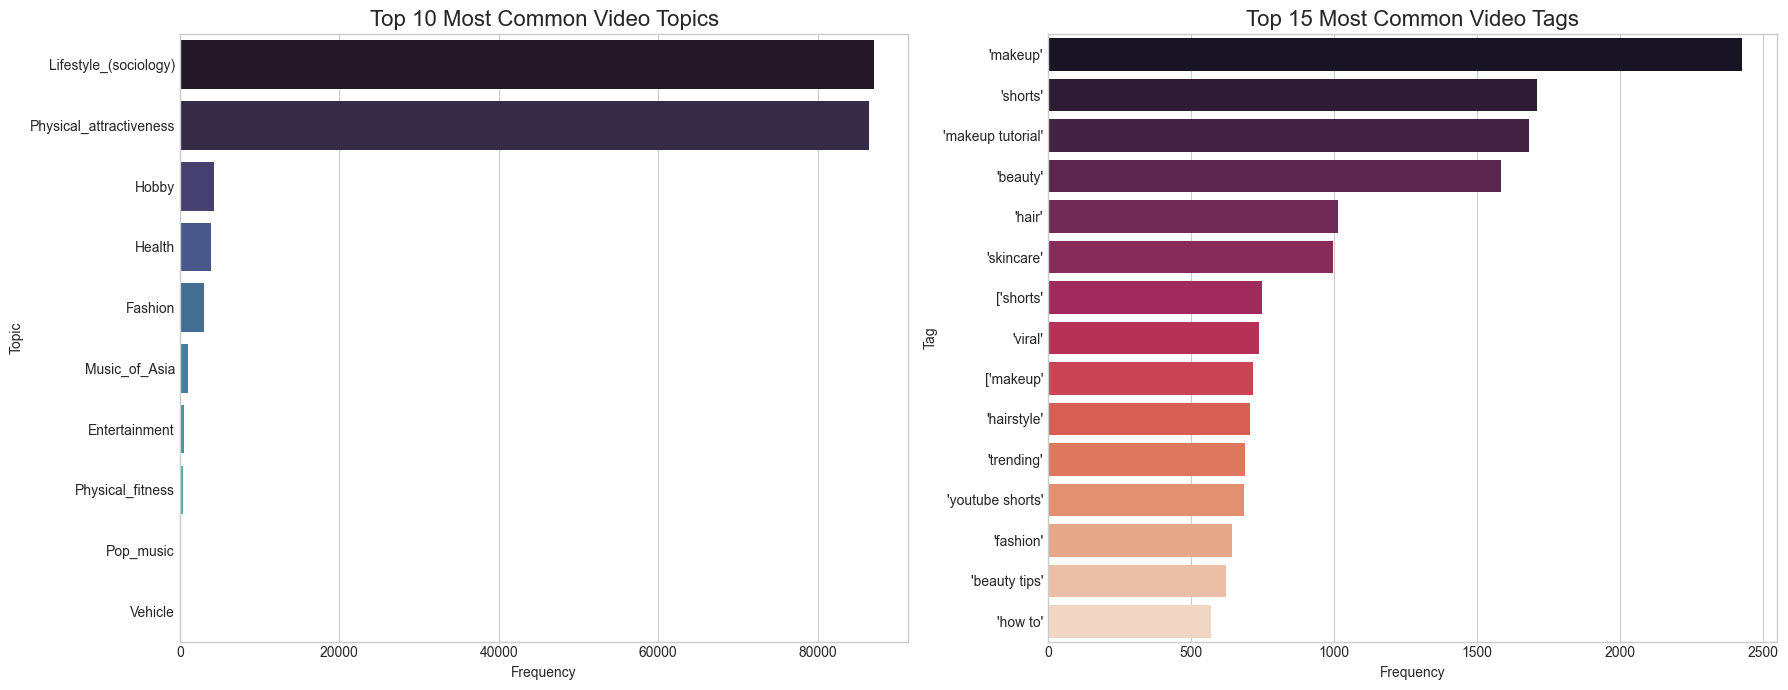

In [11]:
# Safely parse the topicCategories string
def parse_topics(x):
    try:
        # Use ast.literal_eval for safe evaluation of the string
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df['topic_list'] = df['topicCategories'].apply(parse_topics)
all_topics = [topic.split('/')[-1] for sublist in df['topic_list'] for topic in sublist]
top_topics = Counter(all_topics).most_common(10)

# Analyze tags
all_tags = [tag.strip().lower() for sublist in df['tags'].str.split(',') for tag in sublist if tag.strip()]
top_tags = Counter(all_tags).most_common(15)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Top Topics Plot
topics_df = pd.DataFrame(top_topics, columns=['Topic', 'Count'])
sns.barplot(data=topics_df, x='Count', y='Topic', ax=ax1, palette='mako')
ax1.set_title('Top 10 Most Common Video Topics', fontsize=16)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Topic')

# Top Tags Plot
tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])
sns.barplot(data=tags_df, x='Count', y='Tag', ax=ax2, palette='rocket')
ax2.set_title('Top 15 Most Common Video Tags', fontsize=16)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Tag')

plt.tight_layout()
plt.show()

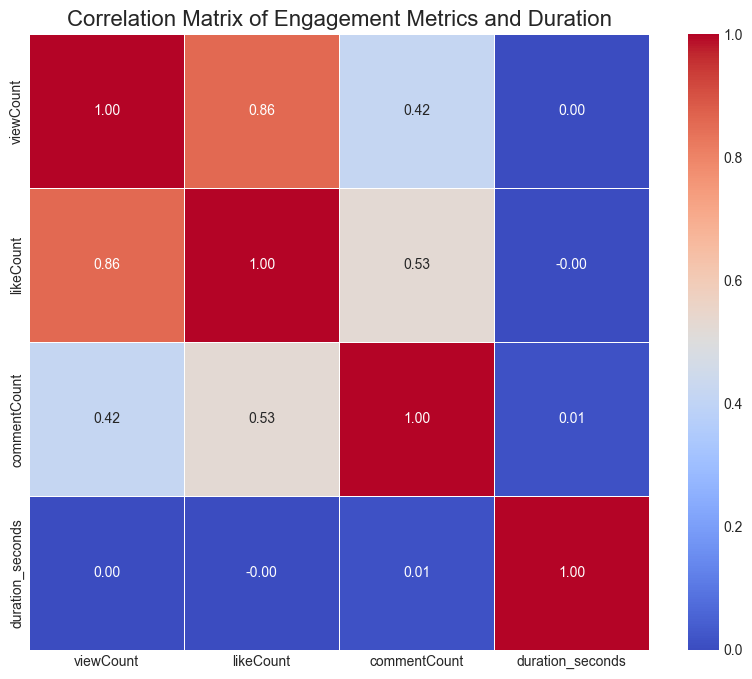

In [ ]:
# Select key numerical columns for correlation analysis
corr_df = df[['viewCount', 'likeCount', 'commentCount', 'duration_seconds']]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Engagement Metrics and Duration', fontsize=16)
plt.show()          

C:\Users\User\AppData\Local\Temp\ipykernel_19884\899489139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration_bin'] = pd.cut(df_filtered['duration_seconds'], bins=bins, labels=labels, right=False)
C:\Users\User\AppData\Local\Temp\ipykernel_19884\899489139.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_views_by_duration = df_filtered.groupby('duration_bin')['viewCount'].median().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_19884\899489139.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is depre

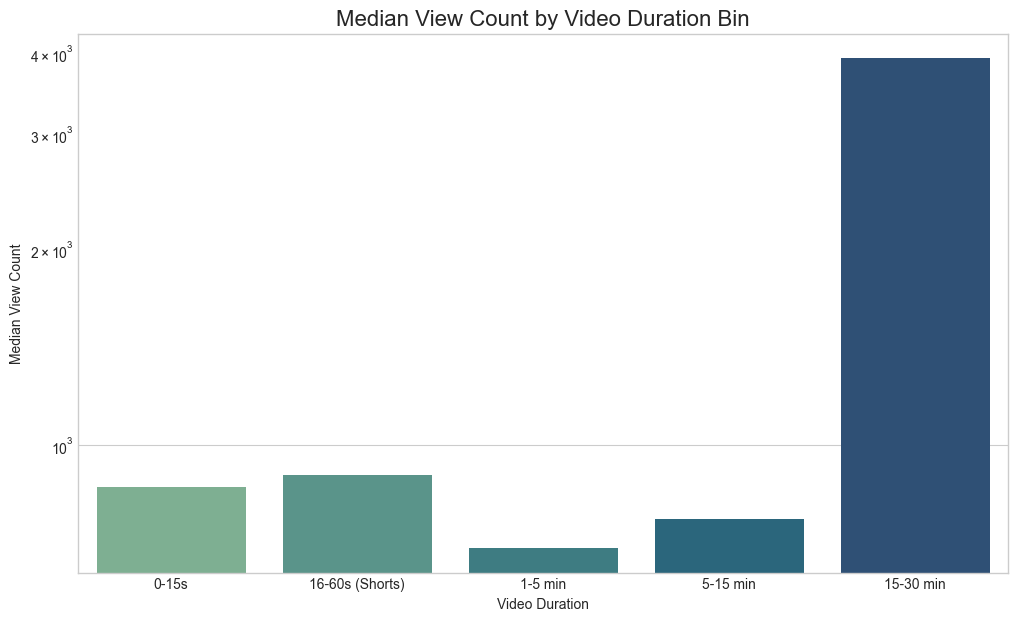

In [13]:
# Filter out extreme duration outliers for better visualization (e.g., videos > 1800 seconds or 30 mins)
df_filtered = df[df['duration_seconds'] < 1800]

# Create duration bins
bins = [0, 15, 60, 300, 900, 1800]
labels = ['0-15s', '16-60s (Shorts)', '1-5 min', '5-15 min', '15-30 min']
df_filtered['duration_bin'] = pd.cut(df_filtered['duration_seconds'], bins=bins, labels=labels, right=False)

# Calculate median view count per duration bin
median_views_by_duration = df_filtered.groupby('duration_bin')['viewCount'].median().reset_index()

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=median_views_by_duration, x='duration_bin', y='viewCount', palette='crest')
plt.title('Median View Count by Video Duration Bin', fontsize=16)
plt.xlabel('Video Duration')
plt.ylabel('Median View Count')
plt.yscale('log') # Use log scale for better visibility
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\3287525194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_engagement.index, y=daily_engagement.values, palette='viridis')


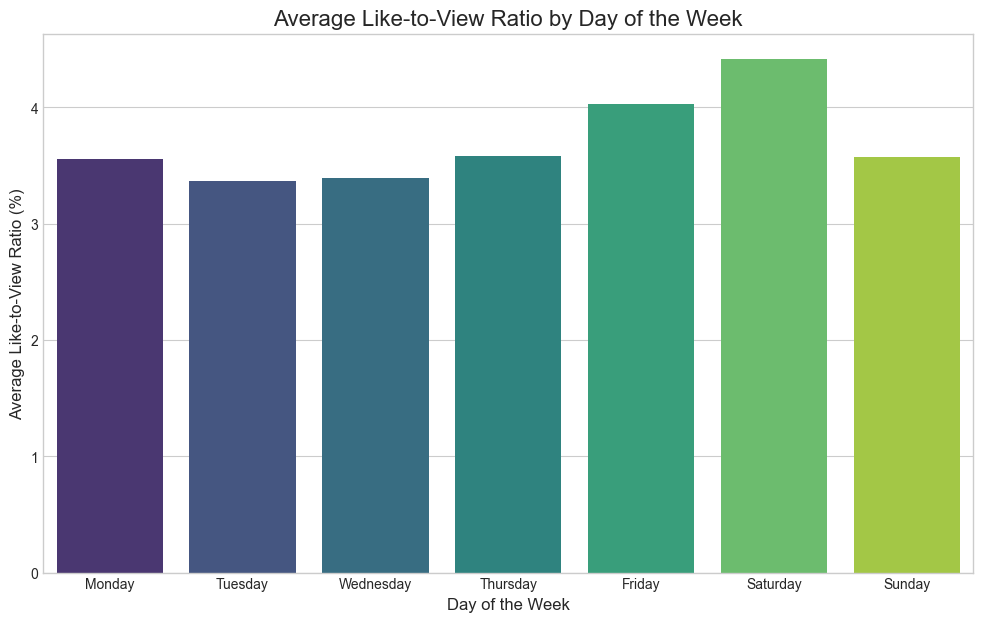

In [16]:
# Create the 'like_to_view_ratio' column
# Add a small epsilon (1) to viewCount to prevent division by zero
df['like_to_view_ratio'] = (df['likeCount'] / (df['viewCount'] + 1)) * 100 # As a percentage

# --- CORRECTED GRAPH CODE ---
plt.figure(figsize=(12, 7))

# Define the correct order for the days of the week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# The 'groupby' was corrected from 'day_of_week' to 'publish_dayofweek'
daily_engagement = df.groupby('publish_dayofweek')['like_to_view_ratio'].mean()

# Reorder the results to follow the chronological day order
daily_engagement = daily_engagement.reindex(day_order)

sns.barplot(x=daily_engagement.index, y=daily_engagement.values, palette='viridis')

plt.title('Average Like-to-View Ratio by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Like-to-View Ratio (%)', fontsize=12)
plt.show()

--- Top 10 Performing Videos ---
                                                   title  channelId  \
42479  Korean Secret Glowing Skin Mask | Beauty Secre...      26428   
53418                 Sydney Sweeney Perfecting the Shot      41338   
25465   it’s FREAKY FRIDAY!! Her brows are made of GEMS…      45729   
61709  beauty tips #Korean #eyebrows setting #youtube...      17225   
80389  Rate this transition ⭐️#shorts #youtubeshorts ...      33476   
49423          Every girls can be gorgeous after make up      53183   
78021  White Men Wear Wigs Too &amp; FAKE Man Beard 👏🏼❤️      37625   
40709                  IT’S FREAK FRIDAY! THAT WAS CRAZY      45729   
58449      I think I used to much of the bronzing drops…      45729   
57435  We just used the SAME makeup wipe on our BALD ...      45729   

       viewCount  likeCount  duration_seconds  
42479  405748145    4102127              27.0  
53418  264368764    7162433              18.0  
25465  252195721    5409360              

C:\Users\User\AppData\Local\Temp\ipykernel_19884\1089864255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_channels_df, x='viewCount', y='channelId', orient='h', palette='viridis', order=top_10_channels_df['channelId'])


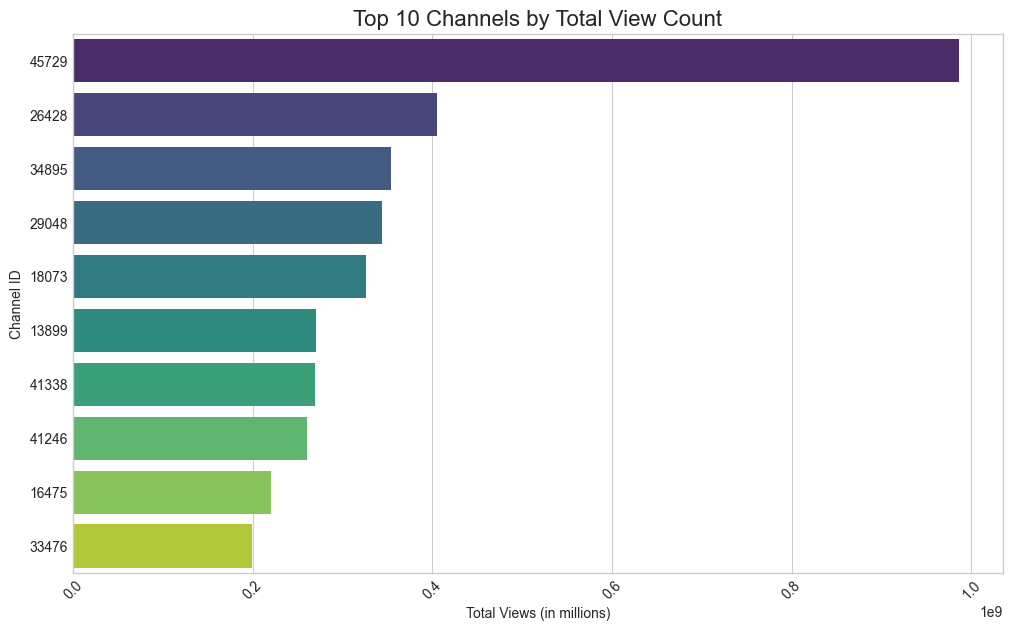

In [17]:
# Sort the DataFrame by viewCount to find top videos
top_10_videos = df.sort_values(by='viewCount', ascending=False).head(10)

print("--- Top 10 Performing Videos ---")
# Displaying relevant columns for context
print(top_10_videos[['title', 'channelId', 'viewCount', 'likeCount', 'duration_seconds']])

# --- Top 10 Performing Channels ---
# Group by channelId and sum their views, then sort
top_10_channels = df.groupby('channelId')['viewCount'].sum().sort_values(ascending=False).head(10)
top_10_channels_df = top_10_channels.reset_index()

print("\n--- Top 10 Performing Channels (by Total Views in Dataset) ---")
print(top_10_channels)

# Visualization of Top Channels
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_channels_df, x='viewCount', y='channelId', orient='h', palette='viridis', order=top_10_channels_df['channelId'])
plt.title('Top 10 Channels by Total View Count', fontsize=16)
plt.xlabel('Total Views (in millions)')
plt.ylabel('Channel ID')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\2995972463.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_lang, x='audio_language', y='viewCount', palette='magma', order=top_languages)


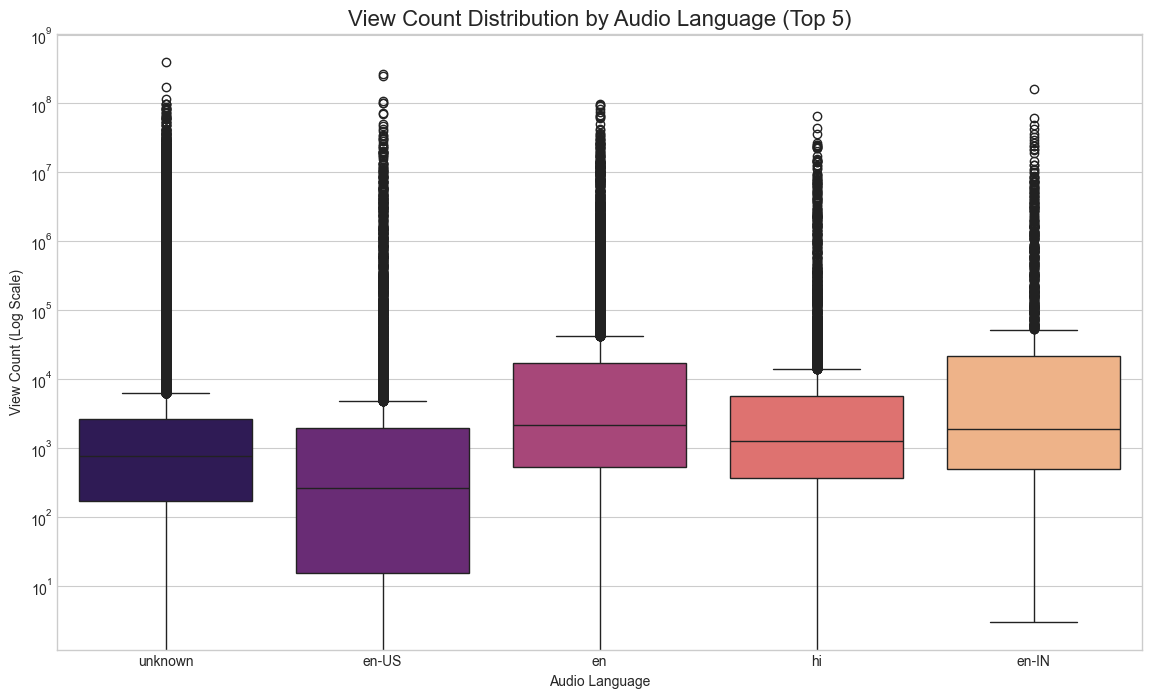

In [18]:
# Focus on defaultAudioLanguage as it's more reliable, fill missing with 'unknown'
df['audio_language'] = df['defaultAudioLanguage'].fillna('unknown')

# Get the count of the top 5 languages
top_languages = df['audio_language'].value_counts().nlargest(5).index

# Filter the DataFrame to only include these top languages
df_top_lang = df[df['audio_language'].isin(top_languages)]

# Create a box plot to see the distribution of views
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_lang, x='audio_language', y='viewCount', palette='magma', order=top_languages)
plt.title('View Count Distribution by Audio Language (Top 5)', fontsize=16)
plt.xlabel('Audio Language')
plt.ylabel('View Count (Log Scale)')
plt.yscale('log') # Log scale is essential due to outliers
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\2562212008.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_topics, x='topic', y='viewCount', order=top_5_topics, palette='crest')


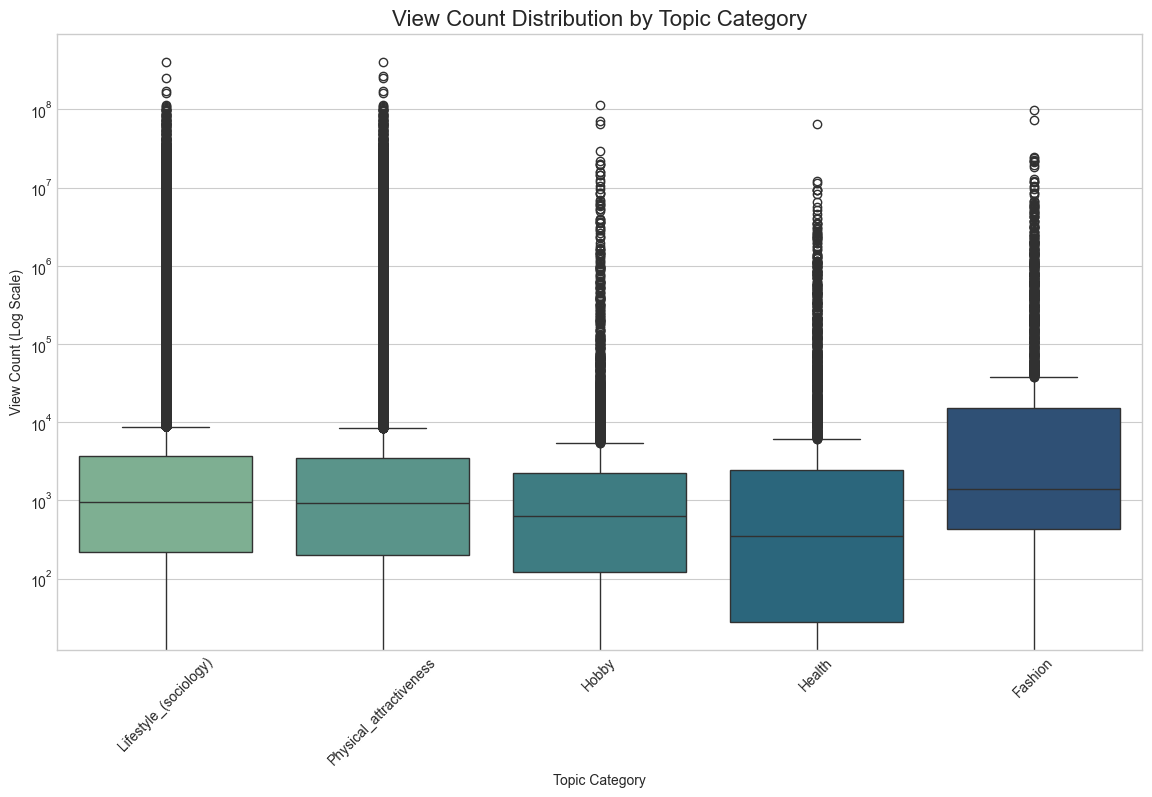

In [19]:
# Explode the topic_list so each topic gets its own row
df_topics = df.explode('topic_list')
df_topics['topic'] = df_topics['topic_list'].str.split('/').str[-1] # Clean the topic name

# Get the top 5 topics by frequency
top_5_topics = df_topics['topic'].value_counts().nlargest(5).index

# Filter for only the top 5 topics
df_top_5_topics = df_topics[df_topics['topic'].isin(top_5_topics)]

# Visualize the distribution
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_5_topics, x='topic', y='viewCount', order=top_5_topics, palette='crest')
plt.title('View Count Distribution by Topic Category', fontsize=16)
plt.xlabel('Topic Category')
plt.ylabel('View Count (Log Scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\712354783.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='Frequency', y='Word', palette='rocket')


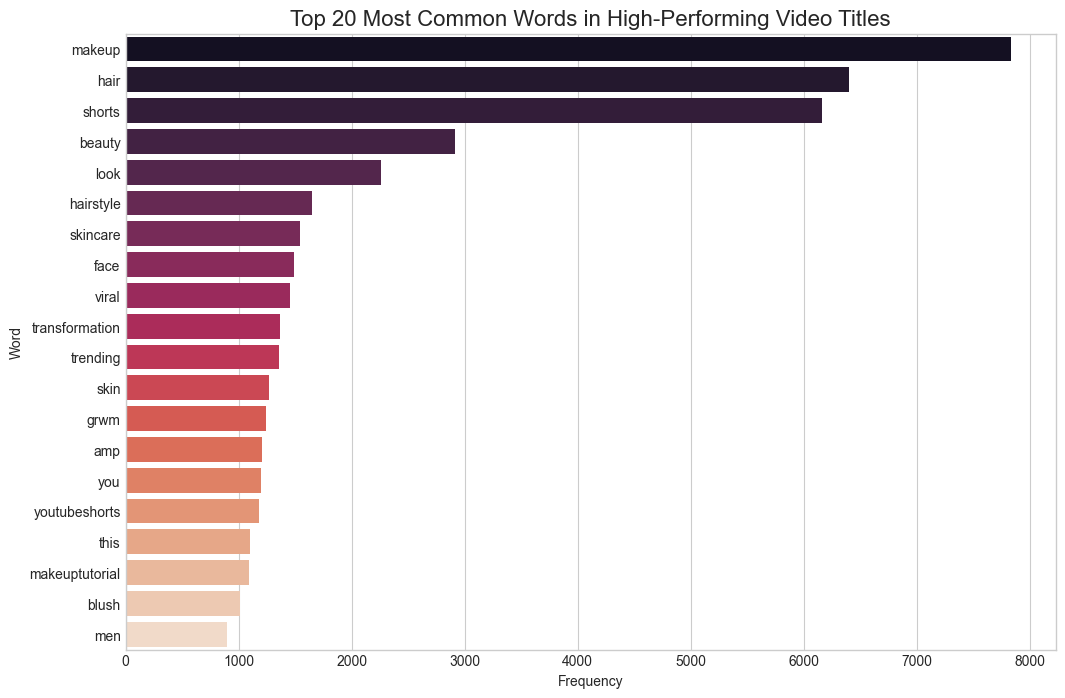

In [20]:
from collections import Counter
import re

# Define high-performance as the top 25% of videos by view count
quantile_75 = df['viewCount'].quantile(0.75)
high_performers = df[df['viewCount'] >= quantile_75]

# Combine all titles from high-performing videos into one text block
all_titles = ' '.join(high_performers['title'].dropna().str.lower())

# Use regex to find all words, excluding common symbols
words = re.findall(r'\b\w+\b', all_titles)

# Define common stopwords to exclude from the analysis
stopwords = ['the', 'a', 'to', 'in', 'for', 'of', 'and', 'is', 'on', 'with', 'how', 'your', 'i', 's', 'my']
filtered_words = [word for word in words if word not in stopwords and not word.isdigit()]

# Get the 20 most common words
word_counts = Counter(filtered_words)
top_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=top_words_df, x='Frequency', y='Word', palette='rocket')
plt.title('Top 20 Most Common Words in High-Performing Video Titles', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19884\2443300185.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_by_duration = df.groupby('duration_bin')['comment_to_like_ratio'].median().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_19884\2443300185.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratio_by_duration, x='duration_bin', y='comment_to_like_ratio', palette='cubehelix')


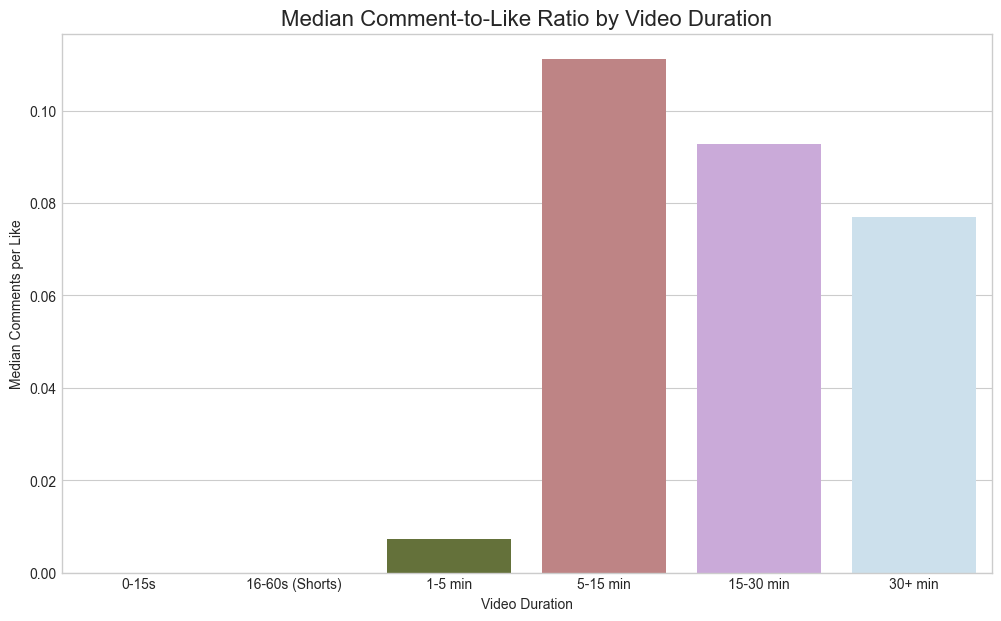

In [21]:
# Calculate comment-to-like ratio (add 1 to likes to avoid division by zero)
df['comment_to_like_ratio'] = df['commentCount'] / (df['likeCount'] + 1)

# Group by the duration bins we created earlier
# Using median is more robust to outliers than mean
ratio_by_duration = df.groupby('duration_bin')['comment_to_like_ratio'].median().reset_index()

# Plotting the results
plt.figure(figsize=(12, 7))
sns.barplot(data=ratio_by_duration, x='duration_bin', y='comment_to_like_ratio', palette='cubehelix')
plt.title('Median Comment-to-Like Ratio by Video Duration', fontsize=16)
plt.xlabel('Video Duration')
plt.ylabel('Median Comments per Like')
plt.show()

In [22]:
import pandas as pd
from scipy.stats import f_oneway

# Ensure previous calculations are present
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publish_dayofweek'] = df['publishedAt'].dt.day_name()
df['like_to_view_ratio'] = (df['likeCount'] / (df['viewCount'] + 1)) * 100

# Create a list of the ratio series for each day
daily_groups = [df['like_to_view_ratio'][df['publish_dayofweek'] == day] for day in df['publish_dayofweek'].unique()]

# Perform the ANOVA test
f_stat, p_value = f_oneway(*daily_groups)

print(f"--- ANOVA Test for Like-to-View Ratio by Day of the Week ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("This suggests there is a statistically significant difference in the like-to-view ratio among different days of the week. 🎯")
else:
    print("\nConclusion: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("This suggests that the observed differences in the like-to-view ratio are likely due to random chance. 🎲")

--- ANOVA Test for Like-to-View Ratio by Day of the Week ---
F-statistic: 0.8940
P-value: 0.4980

Conclusion: The p-value is greater than 0.05, so we fail to reject the null hypothesis.
This suggests that the observed differences in the like-to-view ratio are likely due to random chance. 🎲


C:\Users\User\AppData\Local\Temp\ipykernel_19884\851181435.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_engagement.index, y=hourly_engagement.values, palette='plasma')


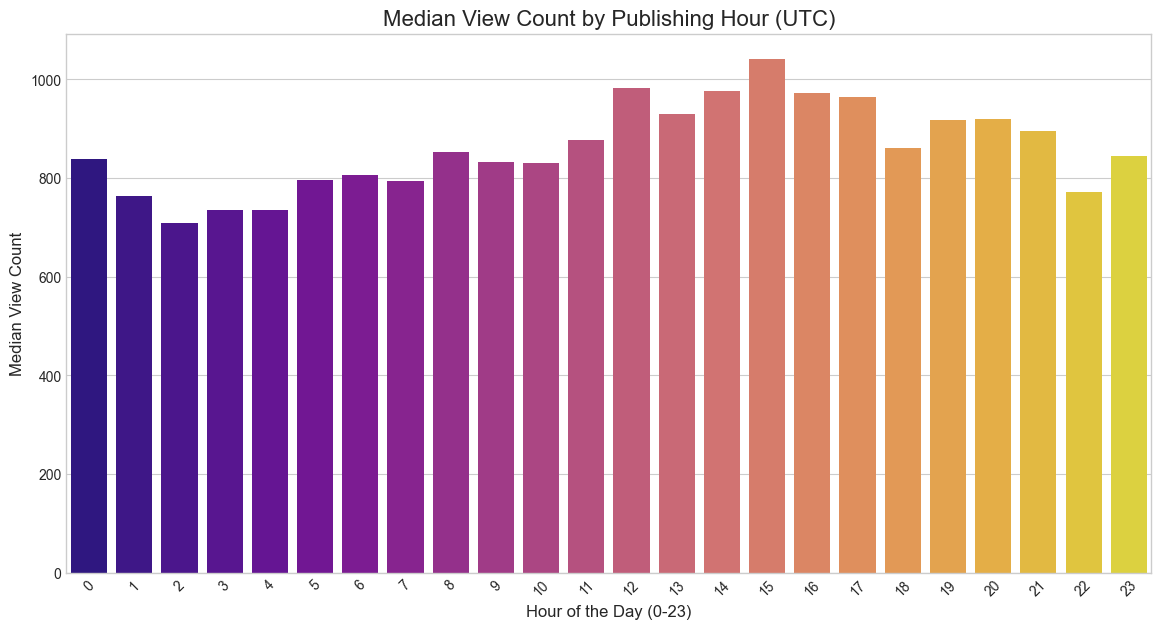

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the hour from the 'publishedAt' column
df['publish_hour'] = df['publishedAt'].dt.hour

# Group by hour and calculate the median view count
hourly_engagement = df.groupby('publish_hour')['viewCount'].median()

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(x=hourly_engagement.index, y=hourly_engagement.values, palette='plasma')
plt.title('Median View Count by Publishing Hour (UTC)', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Median View Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define high-performing (top 25%) and low-performing (bottom 75%) videos
quantile_75 = df['viewCount'].quantile(0.75)
high_perf_titles = df[df['viewCount'] >= quantile_75]['title'].dropna()
low_perf_titles = df[df['viewCount'] < quantile_75]['title'].dropna()

# Create two 'documents'
corpus = [
    ' '.join(high_perf_titles),
    ' '.join(low_perf_titles)
]

# Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names and create a DataFrame for high-performers
feature_names = vectorizer.get_feature_names_out()
high_perf_scores = tfidf_matrix[0].T.todense()
tfidf_df = pd.DataFrame(high_perf_scores, index=feature_names, columns=['TF-IDF Score']).sort_values(by='TF-IDF Score', ascending=False)

print("--- Top Words in High-Performing Titles (by TF-IDF Score) ---")
print(tfidf_df)

--- Top Words in High-Performing Titles (by TF-IDF Score) ---
                TF-IDF Score
makeup              0.589221
hair                0.481078
shorts              0.463030
beauty              0.219445
look                0.170111
hairstyle           0.123861
skincare            0.115814
face                0.111903
viral               0.109572
transformation      0.102428
trending            0.102352
skin                0.095659
grwm                0.093704
amp                 0.090921
youtubeshorts       0.088740
39                  0.084228
men                 0.067458
glow                0.062269
beautiful           0.056102
best                0.053846


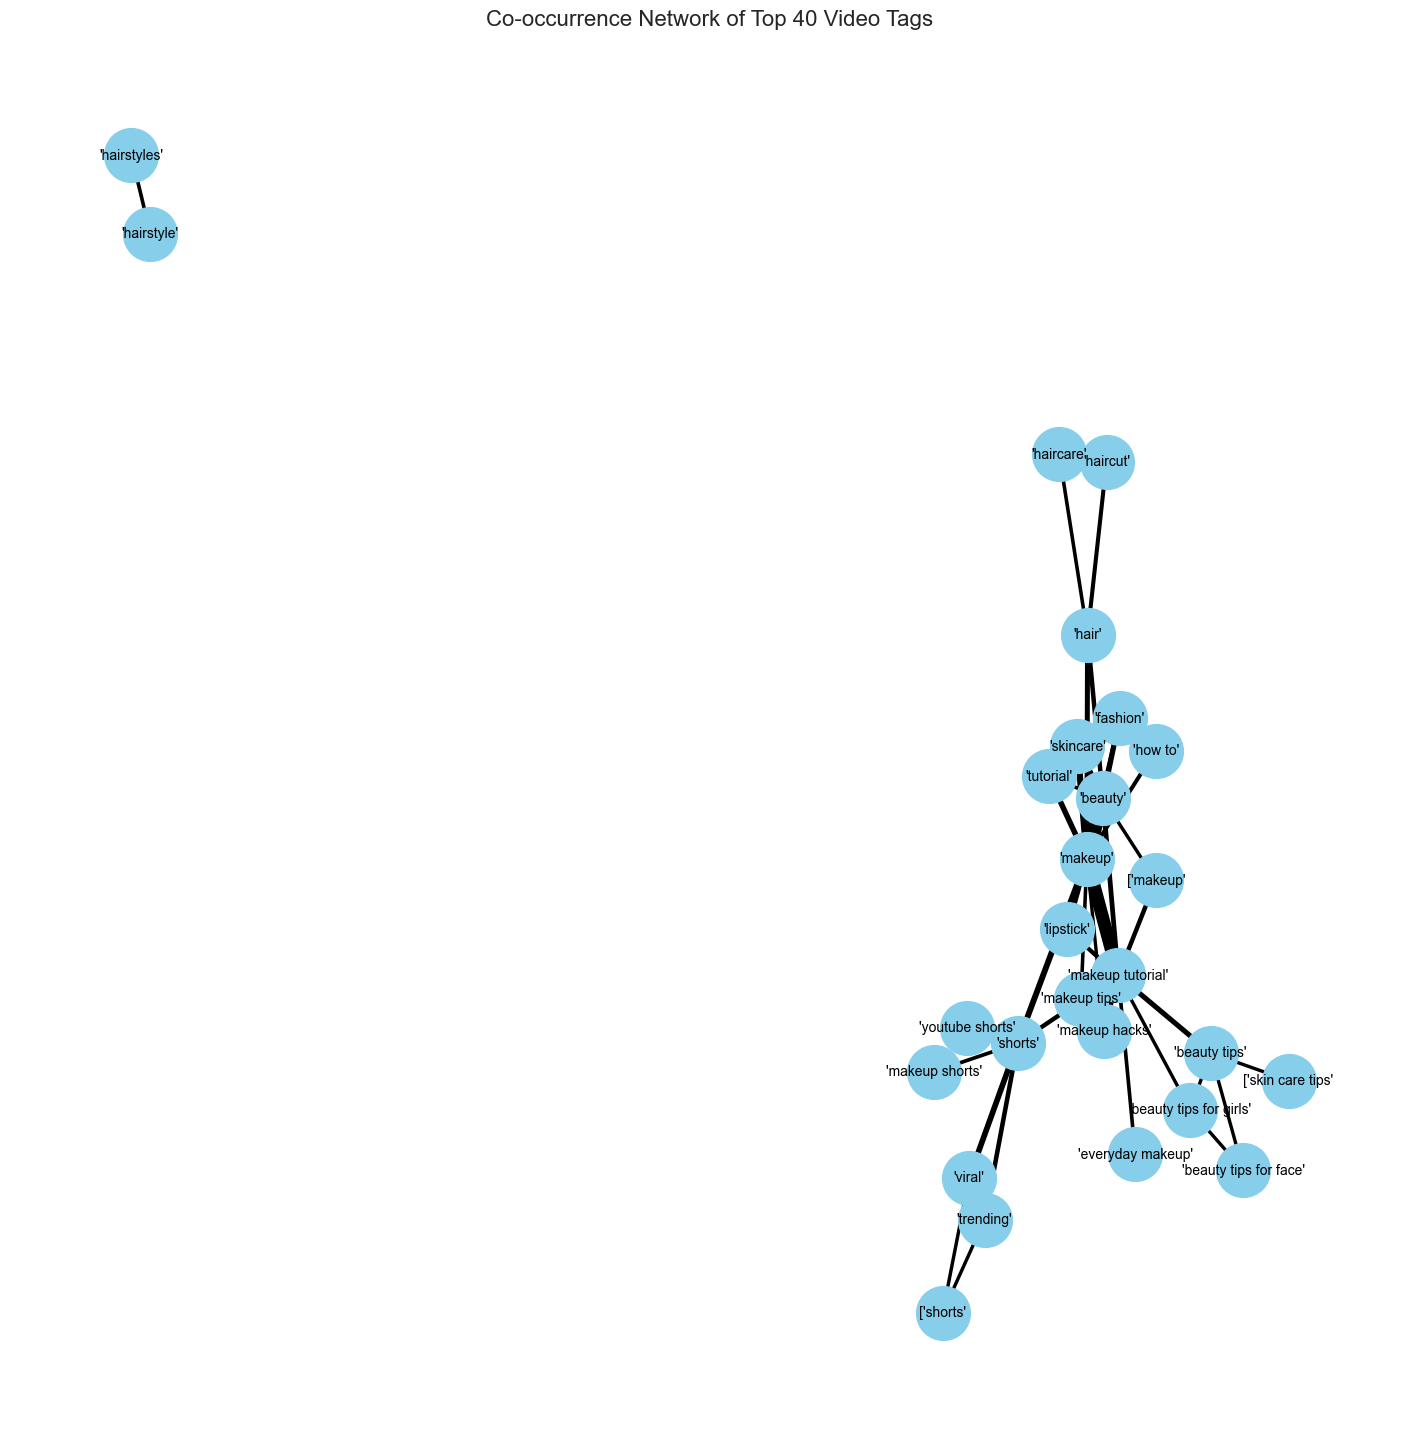

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# Clean and split tags, filtering out videos with less than 2 tags
tag_lists = df['tags'].str.split(',').apply(lambda x: [tag.strip().lower() for tag in x if tag.strip()] if isinstance(x, list) else []).tolist()
tag_pairs = [list(combinations(sorted(tags), 2)) for tags in tag_lists if len(tags) > 1]
all_pairs = [pair for sublist in tag_pairs for pair in sublist]

# --- CORRECTED GRAPH DATA PREPARATION ---
# Count the occurrences of each pair
edge_counts = Counter(all_pairs)

# Convert the most common pairs into a structured DataFrame
top_pairs = edge_counts.most_common(40)
edges_df = pd.DataFrame(top_pairs, columns=['pair', 'weight'])
# Split the tuple in the 'pair' column into 'source' and 'target' columns
edges_df[['source', 'target']] = pd.DataFrame(edges_df['pair'].tolist(), index=edges_df.index)
edges_df = edges_df.drop('pair', axis=1) # Drop the original 'pair' column

# Create the graph from the corrected DataFrame
G = nx.from_pandas_edgelist(edges_df, 
                            source='source', 
                            target='target', 
                            edge_attr='weight')

# --- PLOTTING CODE (Now works correctly) ---
# Draw the network graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.6, iterations=50, seed=42) # Added a seed for reproducibility
edge_widths = [d['weight'] / edges_df['weight'].max() * 10 for u, v, d in G.edges(data=True)] # Normalize widths
nx.draw(G, pos, 
        with_labels=True, 
        node_size=1500, 
        node_color='skyblue', 
        font_size=10, 
        width=edge_widths)
plt.title('Co-occurrence Network of Top 40 Video Tags', fontsize=16)
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Select engagement metrics
metrics = df[['viewCount', 'likeCount', 'commentCount']].copy()
# Add days since published for normalization
metrics['days_since_published'] = (pd.Timestamp.now(tz='UTC') - df['publishedAt']).dt.days + 1
# Calculate engagement per day
metrics['views_per_day'] = metrics['viewCount'] / metrics['days_since_published']
metrics['likes_per_day'] = metrics['likeCount'] / metrics['days_since_published']
metrics['comments_per_day'] = metrics['commentCount'] / metrics['days_since_published']


# Normalize the per-day metrics to a 0-1 scale
scaler = MinMaxScaler()
metrics_scaled = scaler.fit_transform(metrics[['views_per_day', 'likes_per_day', 'comments_per_day']])

# Create the virality score (e.g., weighted average)
# Let's give views more weight
weights = {'views': 0.6, 'likes': 0.3, 'comments': 0.1}
df['virality_score'] = (metrics_scaled[:, 0] * weights['views'] + 
                        metrics_scaled[:, 1] * weights['likes'] + 
                        metrics_scaled[:, 2] * weights['comments'])

# Display the top 10 videos by this new score
top_viral_videos = df.sort_values(by='virality_score', ascending=False).head(10)

print("--- Top 10 Videos by Composite Virality Score ---")
print(top_viral_videos[['title', 'viewCount', 'likeCount', 'virality_score']])

--- Top 10 Videos by Composite Virality Score ---
                                                   title  viewCount  \
25465   it’s FREAKY FRIDAY!! Her brows are made of GEMS…  252195721   
42479  Korean Secret Glowing Skin Mask | Beauty Secre...  405748145   
19273  Born to be both ♥️♥️ #vitiligo #skin #makeup #...   80591595   
53418                 Sydney Sweeney Perfecting the Shot  264368764   
12963  SELF WEDDING MAKEUP 2025#shorts #viralvideo #b...   53506427   
40709                  IT’S FREAK FRIDAY! THAT WAS CRAZY  107817155   
14623  you can call me a kpop star now thank youuu Co...   19166500   
52804  What do y’all think of her hair transformation⁉️🤪   42673408   
48376  I’m not brown🟤 🙎🏽‍♀️ #relatable #trend #shorts...   79128271   
57435  We just used the SAME makeup wipe on our BALD ...  102235199   

       likeCount  virality_score  
25465    5409360        0.905595  
42479    4102127        0.599394  
19273    1564582        0.493155  
53418    7162433        0.45